# Exploratory Data Analysis

Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

# About Project

we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.

In [1]:
import pandas as pd
import numpy as np

In [2]:
survey_raw_df = pd.read_csv(r"C:\Users\Nkmanithia\Survey result 2020 EDA\survey_results_public.csv")

In [3]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
schema_fname = "C:/Users/Nkmanithia/Survey result 2020 EDA/survey_results_schema.csv"
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText


In [6]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

We can now use `schema_raw` to retrieve the full question text for any column in `survey_raw_df`.

In [7]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [8]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [9]:
len(selected_columns)

20

In [10]:
survey_df = survey_raw_df[selected_columns].copy()

In [11]:
schema = schema_raw[selected_columns]

In [12]:
survey_df.shape

(64461, 20)

In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`.

In [14]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


In [15]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [16]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


here seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses.

In [17]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [18]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [19]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [20]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [21]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
36397,United States,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;C;C++;Java;Python;VBA,PHP,Every few months,Play games;Visit Stack Overflow;Go for a walk ...,Student,NaN,NaN,NaN,NaN,NaN,NaN
16177,Bolivia,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,11.0,19.0,4.0,HTML/CSS;Java;JavaScript;Ruby;SQL,JavaScript;Python,Every few months,Meditate;Play games;Call a coworker or friend;...,Employed full-time,"Developer, back-end;Developer, full-stack;Deve...",40.0,Slightly dissatisfied,Flex time or a flexible schedule;Remote work o...,Rarely: 1-2 days per year or less,Fairly important
31620,Sweden,39.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,5.0,26.0,10.0,HTML/CSS;JavaScript;Kotlin;PHP;Python;Scala;SQL,HTML/CSS;Scala;SQL,Every few months,Meditate;Play games;Call a coworker or friend;...,Employed full-time,Academic researcher;Data or business analyst;D...,40.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Very important
59015,Ukraine,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,12.0,6.0,NaN,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Every few months,Call a coworker or friend;Visit Stack Overflow...,"Not employed, but looking for work","Designer;Developer, back-end;Developer, front-...",NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,Fairly important
6170,Bangladesh,32.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,20.0,12.0,8.0,Kotlin;Objective-C;SQL;Swift,Dart;Go;Kotlin;Objective-C;SQL;Swift,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, embedded applications or devices",45.0,Slightly satisfied,How widely used or impactful my work output wo...,Rarely: 1-2 days per year or less,Very important
47453,Belgium,18.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,13.0,5.0,NaN,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Bash/Shell/PowerShell;C;C#;C++;Go;HTML/CSS;Jav...,Every few months,Play games;Call a coworker or friend;Visit Sta...,Student,NaN,NaN,NaN,Flex time or a flexible schedule;Specific depa...,NaN,NaN
30932,Russian Federation,31.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,No,16.0,15.0,10.0,Bash/Shell/PowerShell;C;C++;Java;Python;R;Scal...,Bash/Shell/PowerShell;Java;Python;Scala;SQL,NaN,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data or business analyst;Data scientist or mac...,40.0,Slightly dissatisfied,Industry that I’d be working in;Flex time or a...,Rarely: 1-2 days per year or less,Very important
26258,United States,56.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,38.0,33.0,Python,Python;Rust,Once every few years,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Fairly important
25765,Denmark,43.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,6.0,32.0,26.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",45.0,Very satisfied,Remote work options;Office environment or comp...,Never,Not at all important/not neces

# Exploratory Analysis and Visualization

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [23]:
schema.Country

'Where do you live?'

In [24]:
survey_df.Country.nunique()

183

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [25]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

We can visualize this information using a bar chart.

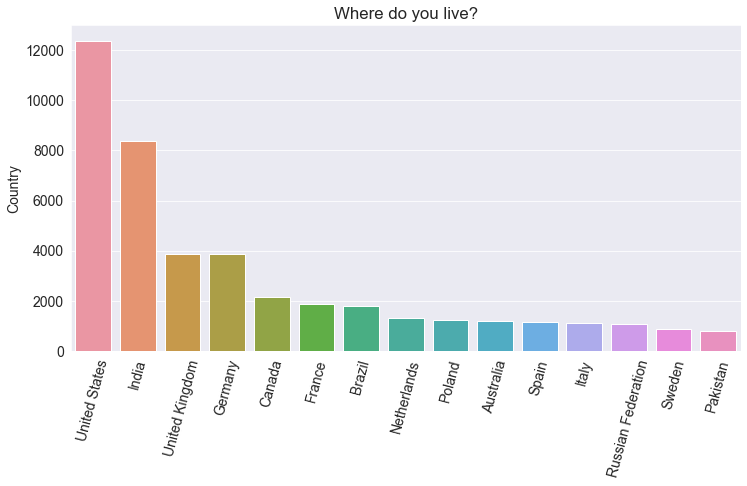

In [26]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);





It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.



### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

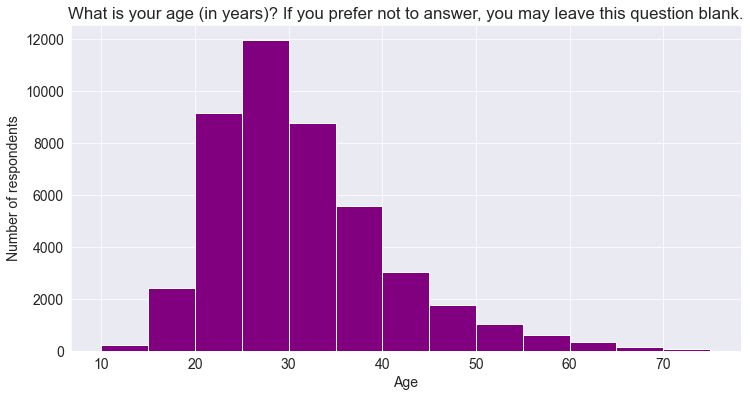

In [27]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [28]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [29]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

A pie chart would be a great way to visualize the distribution.

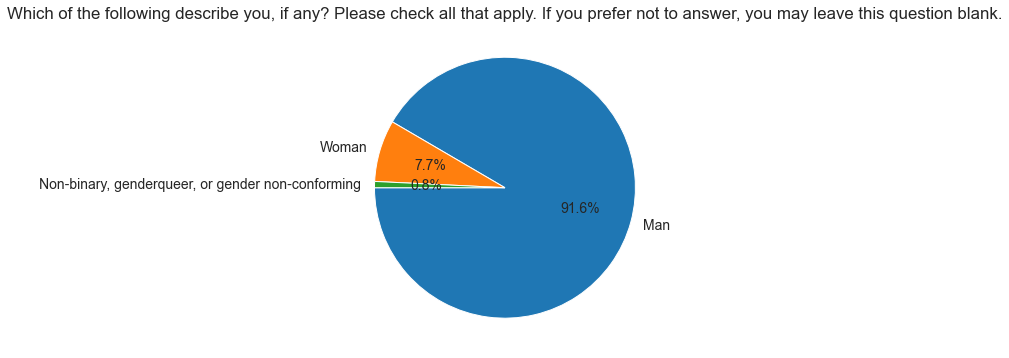

In [30]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

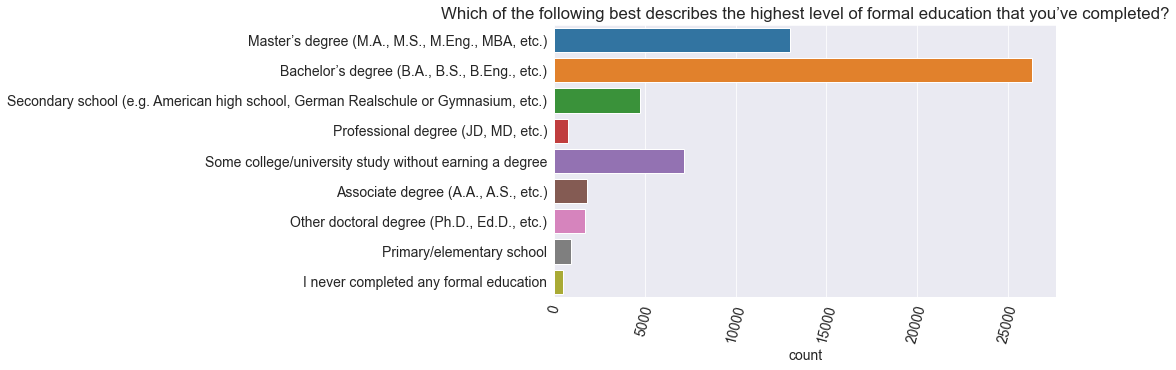

In [31]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [32]:
schema.UndergradMajor

'What was your primary field of study?'

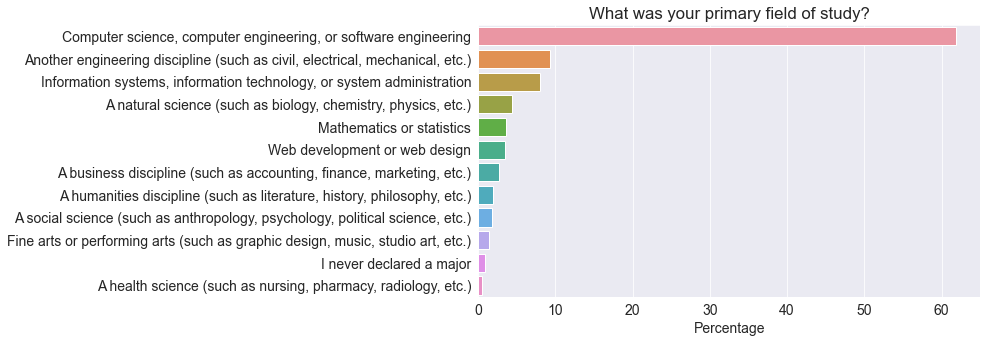

In [33]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [34]:
schema.Employment

'Which of the following best describes your current employment status?'

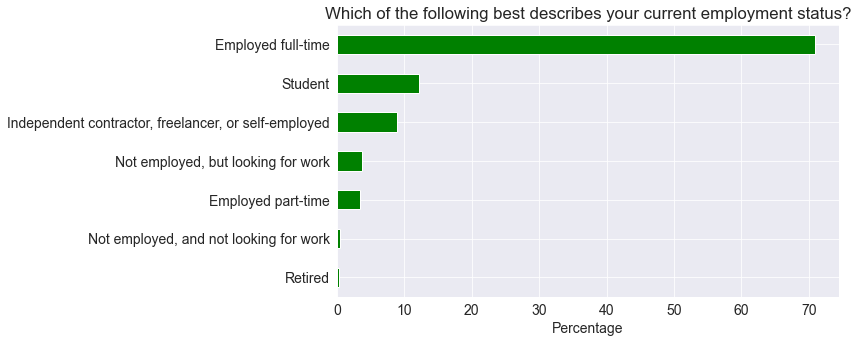

In [35]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.

## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

In [36]:
import matplotlib.pyplot as plt

In [37]:
df=survey_df.dropna(subset=["Country"])
df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63606 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 63606 non-null  object 
 1   Age                     45068 non-null  float64
 2   Gender                  50115 non-null  object 
 3   EdLevel                 56981 non-null  object 
 4   UndergradMajor          50619 non-null  object 
 5   Hobbyist                63606 non-null  object 
 6   Age1stCode              57027 non-null  float64
 7   YearsCode               56339 non-null  float64
 8   YearsCodePro            43794 non-null  float64
 9   LanguageWorkedWith      56932 non-null  object 
 10  LanguageDesireNextYear  53688 non-null  object 
 11  NEWLearn                55730 non-null  object 
 12  NEWStuck                54537 non-null  object 
 13  Employment              63216 non-null  object 
 14  DevType                 48983 non-null

In [39]:
name=df.Country.unique()[df.Country.value_counts()>250]
count=[]
l=list(df.Country.unique())
for i in l:
    if df.groupby(['Country'])['Country'].count()[i]>250:
        x=df.groupby(['Country'])['Country'].count()[i]
        count.append(x)

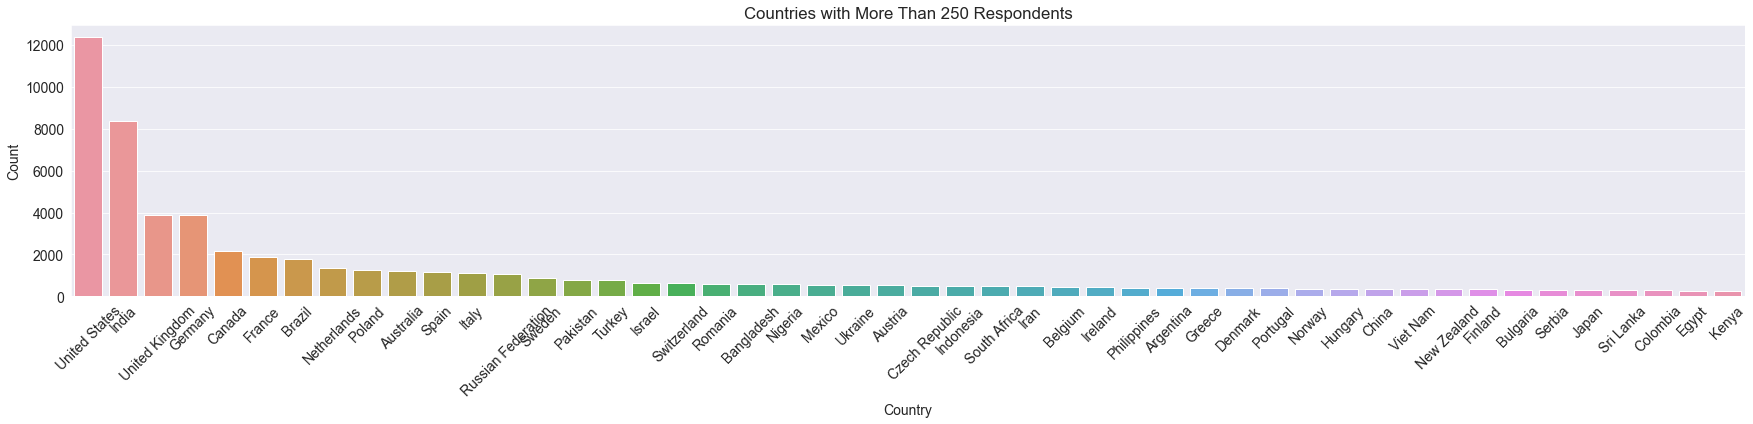

In [40]:
plt.figure(figsize=(30, 5))
country_count = df['Country'].value_counts()
top_countries = country_count[country_count > 250].index
sns.barplot(x=top_countries, y=country_count[top_countries])
plt.title('Countries with More Than 250 Respondents')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45);

Text(0, 0.5, 'Count')

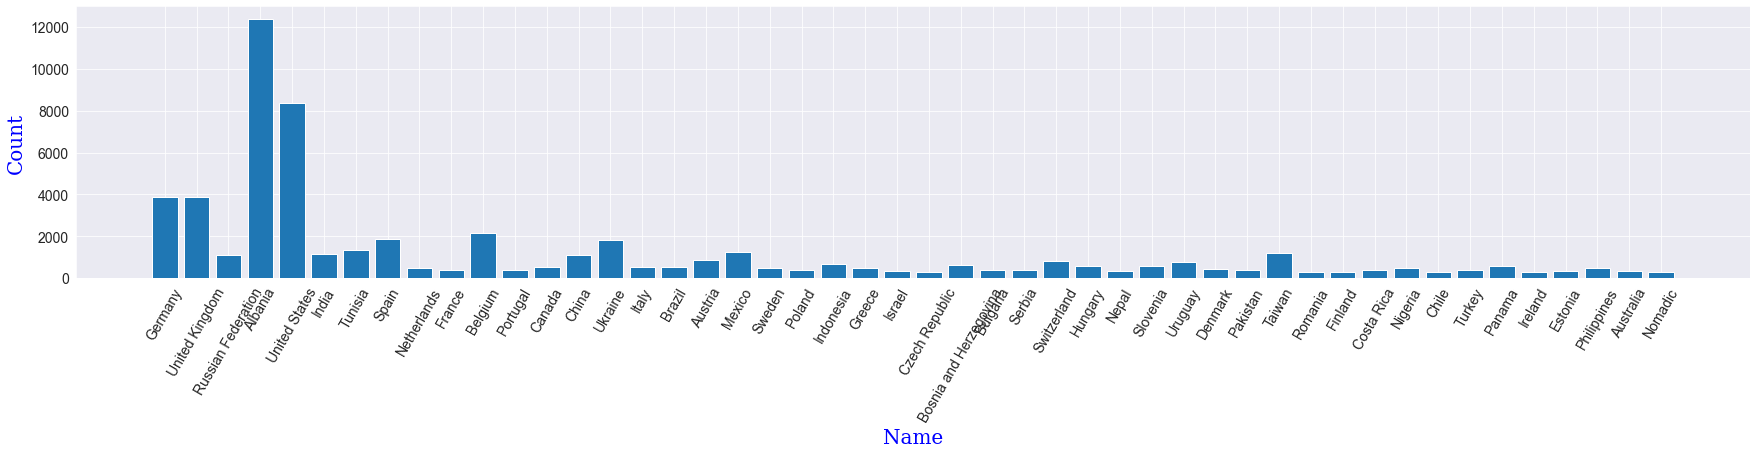

In [41]:
plt.figure(figsize=(30,5))
plt.bar(name, count)
plt.xticks(rotation = 60)
plt.xlabel("Name", fontdict = {'family':'serif','color':'blue','size':20})
plt.ylabel("Count", fontdict = {'family':'serif','color':'blue','size':20})

In [42]:
whr=df[['Country','WorkWeekHrs']]
whr

,Country,WorkWeekHrs
0,Germany,50.0
1,United Kingdom,NaN
2,Russian Federation,NaN
3,Albania,40.0
4,United States,NaN
...,...,...
64456,United States,NaN
64457,Morocco,NaN
64458,Viet Nam,NaN
64459,Poland,NaN


In [43]:
whr=whr.dropna()

In [44]:
l=[]
for i in name:
    x=whr.groupby(['Country']).get_group(i).max()
    l.append(x)
newdf=pd.DataFrame(l) 


In [45]:
newdf.head()

,Country,WorkWeekHrs
0,Germany,100.0
1,United Kingdom,110.0
2,Russian Federation,140.0
3,Albania,60.0
4,United States,140.0


Text(0.5, 1.0, 'Average Working Hours per Week by Country')

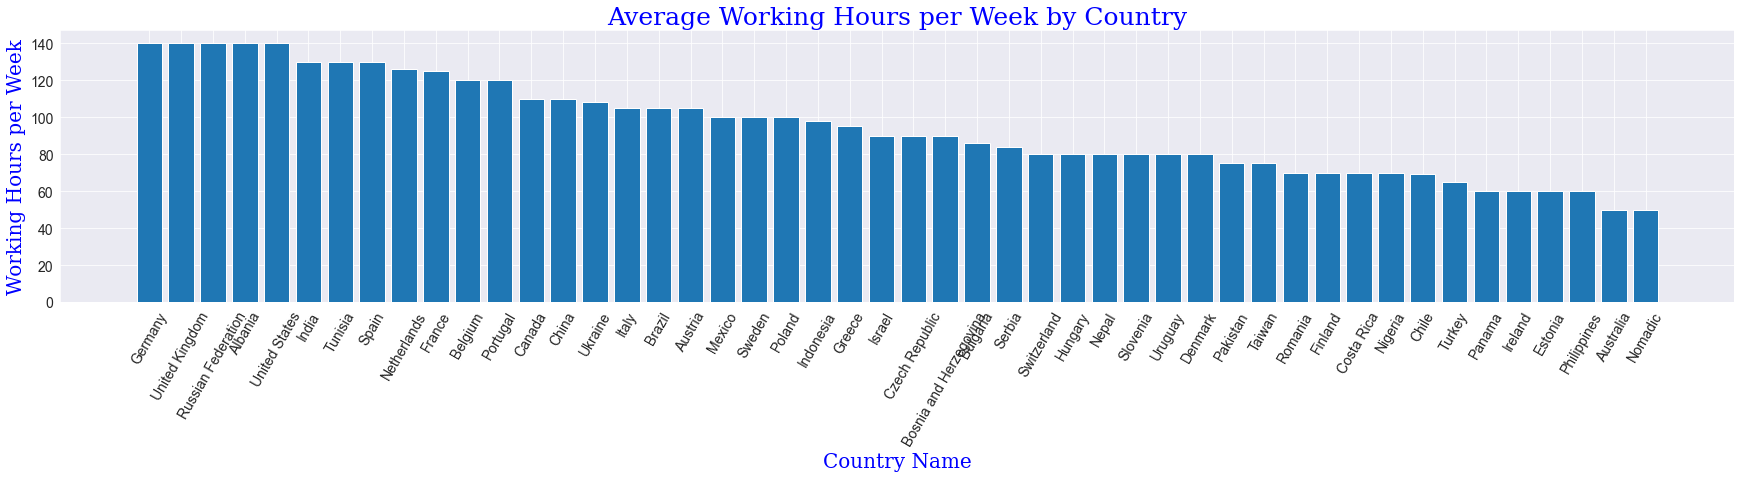

In [46]:
# create a bar chart showing the countries with the highest average working hours per week
plt.figure(figsize=(30,5))
plt.bar(newdf.Country, newdf.WorkWeekHrs.sort_values(ascending=False))
plt.xticks(rotation=60)
plt.xlabel("Country Name", fontdict={'family':'serif', 'color':'blue', 'size':20})
plt.ylabel("Working Hours per Week", fontdict={'family':'serif', 'color':'blue', 'size':20})
plt.title("Average Working Hours per Week by Country", fontdict={'family':'serif', 'color':'blue', 'size':25})

# Q: What are the most popular programming languages in 2020?

In [47]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [48]:
most_used_lang = survey_df['LanguageWorkedWith'].str.split(';').explode().value_counts().idxmax()
most_used_lang

'JavaScript'

In [49]:
langcount=survey_df['LanguageWorkedWith'].str.split(';').explode().value_counts()


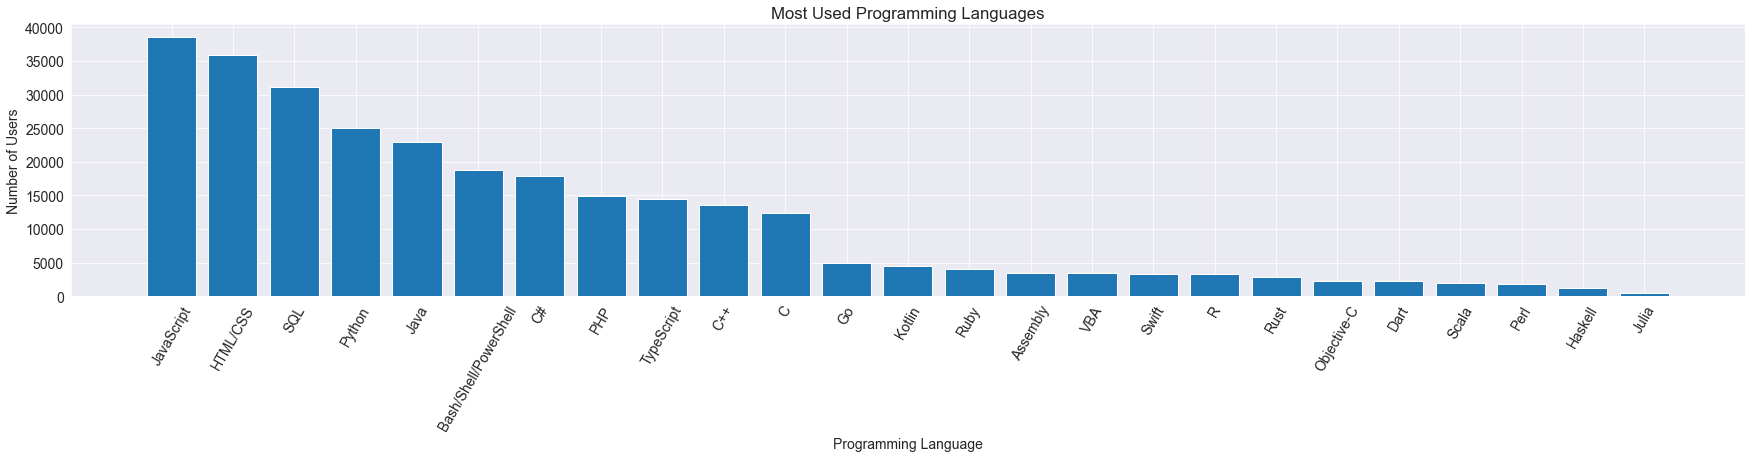

In [50]:
plt.figure(figsize=(30,5))
plt.bar(langcount.index,langcount)
plt.xlabel('Programming Language')
plt.ylabel('Number of Users')
plt.title('Most Used Programming Languages')
plt.xticks(rotation=60);

# Which languages are the most people interested to learn over the next year?

In [51]:
most_used_next=survey_df.LanguageDesireNextYear.str.split(";").explode().value_counts().idxmax()
most_used_next

'Python'

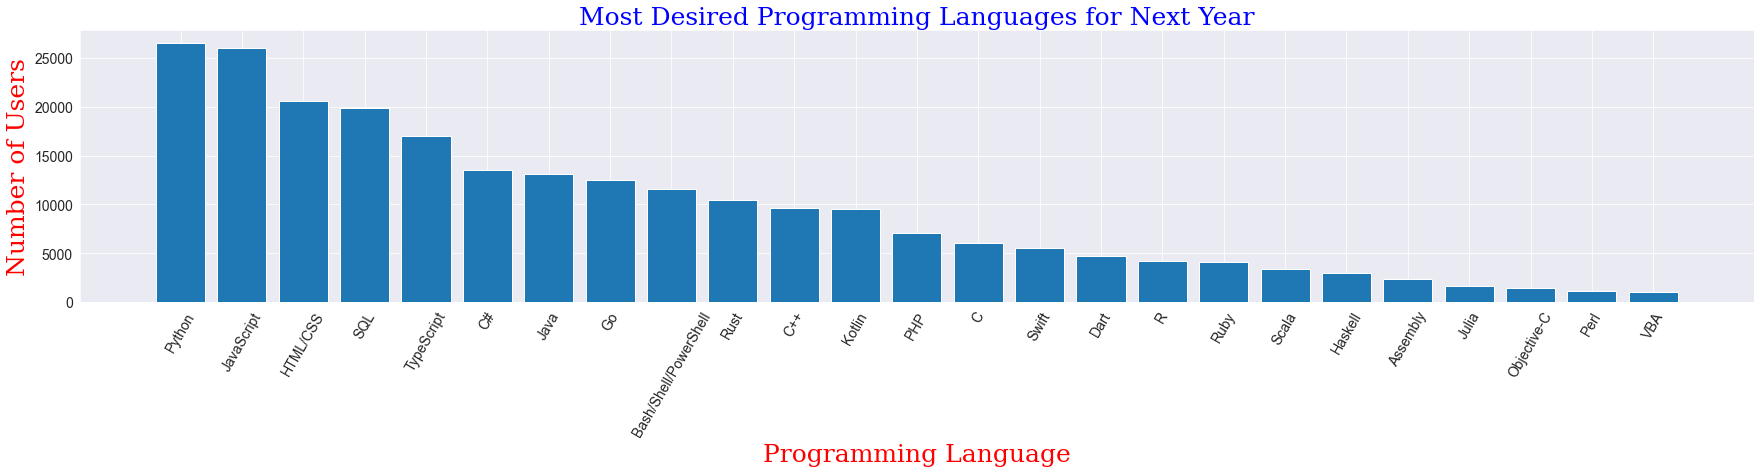

In [52]:
language_count_next_year = survey_df['LanguageDesireNextYear'].str.split(';').explode().value_counts()

plt.figure(figsize=(30,5))
plt.bar(language_count_next_year.index, language_count_next_year)
plt.xlabel('Programming Language',fontdict={'family':'serif', 'color':'red', 'size':25})
plt.ylabel('Number of Users',fontdict={'family':'serif', 'color':'red', 'size':25})
plt.title('Most Desired Programming Languages for Next Year', fontdict={'family':'serif', 'color':'blue', 'size':25})
plt.xticks(rotation=60);
